<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mvs(data):
  '''
  Calculate mean, variance, and standard deviation for an array.
  
  input: the array
  output: dictionary with mean, variation, and standard deviation
  '''

  # size of array and mean
  n = len(data)
  mean = sum(data) / n

  # variance and standard deviation
  sq_differences = [(value - mean)**2 for value in data]
  variance = sum(sq_differences) / (n - 1)
  std = variance ** 0.5

  # package up the results
  results = {'mean': mean, 'variance': variance, 'standard_deviation': std}
  return results

In [3]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_stats = mvs(sales)
pd.Series(sales_stats)

mean                    3052.714286
variance              214387.904762
standard_deviation       463.020415
dtype: float64

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

Since I do know the formula, I'll write my own function (purely in Python alone) and check my results against the library function.

In [0]:
def covariance(data):
  '''
  Calculates variances/covariances between arrays

  input: list of arrays
  output: variance-covariance matrix
  '''

  # Get mean and standard deviations for each array and make parallel list
  data_mvs = []
  size = len(data[0])
  for item in data:
    # Verify the size of each array is equal to the first array's size
    assert len(item) == size, f'Array index {data.index(item)} is of different \
                                length.'   
    data_mvs.append(mvs(item))

  # calculate covariance/variation of each permutation of the two arrays
  # building the matrix
  matrix = []
  for i in range(len(data)):
    row = []
    for j in range(len(data)):
      # Find covariance
      prod = [(data[i][x] - data_mvs[i]['mean']) * (data[j][x] - \
                              data_mvs[j]['mean']) for x in range(len(data[i]))]
      cov = sum(prod) / (len(data[i]) - 1)
      row.append(cov)
    matrix.append(row)

  return matrix

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]


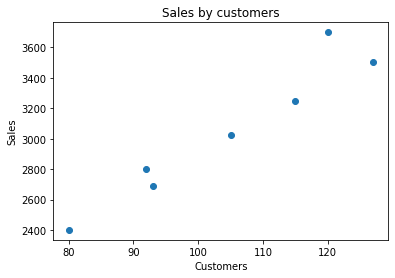

In [6]:
# See what we may expect
plt.scatter(customers, sales)
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales by customers');

In [7]:
# My function for variance-covariance
covar = covariance([sales, customers])
pd.DataFrame(covar)

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


In [8]:
# Compare with library function from Numpy
pd.DataFrame(np.cov(sales, customers))

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
customer_stats = mvs(customers)
r = covar[0][1] / (sales_stats['standard_deviation'] * \
                             customer_stats['standard_deviation'])
print(f"Correlation = {r}")

Correlation = 0.9628339778148909


I'll write a function to generate a correlation matrix as well (good practice -- also w/o library functions, just Python).

In [0]:
def correlation(data):
  '''
  Calculates correlations between arrays

  input: list of arrays
  output: variance-covariance matrix
  '''

  # Get mean and standard deviations for each array and make parallel list
  data_mvs = []
  size = len(data[0])
  for item in data:
    # Verify the size of each array is equal to the first array's size
    assert len(item) == size, f'Array index {data.index(item)} is of different \
                                length.'                                               
    data_mvs.append(mvs(item))

  # calculate correlations of each permutation of the two arrays, building 
  # the matrix
  matrix = []
  for i in range(len(data)):
    row = []
    for j in range(len(data)):
      # covariance
      prod = [(data[i][x] - data_mvs[i]['mean']) * (data[j][x] - \
                              data_mvs[j]['mean']) for x in range(len(data[i]))]
      cov = sum(prod) / (len(data[i]) - 1)
      # correlation
      r = cov / (data_mvs[i]['standard_deviation'] * data_mvs[j]['standard_deviation'])
      row.append(r)
    matrix.append(row)

  return matrix


In [11]:
# My function
corr = correlation([sales, customers])
pd.DataFrame(corr)

,0,1
0,1.000000,0.962834
1,0.962834,1.000000


In [12]:
# Compare with library function from Numpy
pd.DataFrame(np.corrcoef(np.array(sales), customers))

,0,1
0,1.000000,0.962834
1,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [13]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


Even though the filename claims it is a 'cleaned' version, there are still a lot of missing values. So will still need some cleaning and TLC.

In [14]:
titanic_df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [15]:
titanic_df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [16]:
titanic_df.shape

(1310, 16)

In [17]:
# There are a lot of missing values. For all the missing string values, replace 
# NaN with 'unknown'
columns = titanic_df.select_dtypes(include=object).columns.tolist()
for col in columns:
  titanic_df[col].fillna(value='unknown', inplace=True)

titanic_df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   0
sex                    0
age                    0
sibsp                  1
parch                  1
ticket                 0
fare                   2
cabin                  0
embarked               0
boat                   0
body                1189
home.dest              0
has_cabin_number       0
dtype: int64

In [18]:
# 'Body' feature is 91% missing data, so just drop the column. That leaves a few 
# stragglers, so drop the remaining NaNs
titanic_df.drop('body', axis=1, inplace=True)
titanic_df.dropna(inplace=True)

# Drop the 'unknwon' column (duplicate index)
titanic_df.drop('Unnamed: 0', axis=1, inplace=True)

# Check row size and nulls again
print(titanic_df.shape)
titanic_df.isnull().sum()

(1308, 14)


pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
cabin               0
embarked            0
boat                0
home.dest           0
has_cabin_number    0
dtype: int64

OK, now it's "clean as a whistle." Use my functions to calculate the variance-covariance and correlation matrices.

In [0]:
# Get list of numeric columns
numeric_columns = titanic_df.select_dtypes(include=np.number).columns.tolist()

# Make list of numeric columns as lists
features = []
for feature in numeric_columns:
  features.append(titanic_df[feature].tolist())

# Generate variance-covariance and correlation matrices for numeric values
var_covar_matrix = pd.DataFrame(covariance(features), index=numeric_columns,
                                columns=numeric_columns)
corr_matrix = pd.DataFrame(correlation(features), index=numeric_columns,
                                columns=numeric_columns)


In [20]:
titanic_df['age'].head().tolist()

[29.0, 0.9167, 2.0, 30.0, 25.0]

In [21]:
# Look at the resulting variance-covariance matrix
var_covar_matrix

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [22]:
# And the correlation matrix
corr_matrix

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
def plotVectors(vector1, vector2):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.grid()
  plt.arrow(0, 0, vector1[0], vector1[1], color='blue', head_width=.3, head_length=.3)
  plt.arrow(0, 0, vector2[0], vector2[1], color='red', head_width=.3, head_length=.3)
  plt.xlim(-6, 6)
  plt.ylim(-6, 6)
  plt.title(f'Blue {vector1} Red {vector2}')
  plt.show()

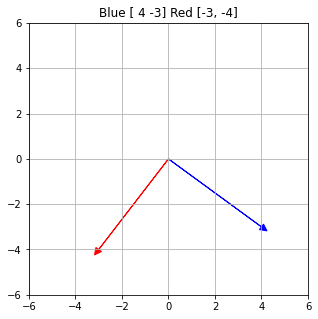

In [24]:
# Generate a random vector and another vector orthogonal to it
v = np.random.randint(-5, 5, (2,))
w = [v[1], -1 * v[0]]

plotVectors(v, w)




Synonym for orthogonal is perpendicular. However, that word may be confusing as one moves into higher dimensions.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def testOrthogonality(vector1, vector2):
  dot_product = vector1.dot(vector2)
  is_ortho = 'are' if dot_product == 0 else 'are not'
  print(f'{a} and {b} {is_ortho} orthogonal. Their dot product is {dot_product}.')

In [26]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
testOrthogonality(a, b)

[-5  3  7] and [ 6 -8  2] are not orthogonal. Their dot product is -40.


Dot products can serve to test to see if two vectors orthogonal, as it actually measures how close two vectors are with each other, how similarly they point. If their dot product is 0, they are orthogonal: they will be 90 degrees apart. By comparison, we can also test the previous vectors that we know are orthogonal:

In [27]:
testOrthogonality(v, w)

[-5  3  7] and [ 6 -8  2] are orthogonal. Their dot product is 0.


Similarly, if the ***cross*** product of two vectors yields the 0 vector, they are colinear (or linearly dependent). I measures how differently the vectors point away from one another.

For example:

In [28]:
c = np.random.randint(-5, 5, (3,))
d = np.array(c * -1)
cross_product = np.cross(c, d)
print(f'{c} X {d} = {cross_product}')

[-2 -1  3] X [ 2  1 -3] = [0 0 0]


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [29]:
c= np.array([2, -15, 6, 20])
c_norm_squared = np.linalg.norm(c) ** 2
c_dot = np.dot(c, c)
c_cT_dot = np.dot(c, c.T)
print(c, c_norm_squared, c_dot, c_cT_dot)

[  2 -15   6  20] 665.0 665 665


I could have told you without computation that they will be equal, algebraically. If you have any vector

\begin{align}\vec{v} = (x_1, x_2, x_3, ... , x_n)\end{align}

Then

\begin{equation*}
||\vec{v}|| = \sqrt{x_1^2 + x_2^2 + x_3^2 +... +x_n^2}
\end{equation*}

Which is to say

\begin{equation*}
||\vec{v}|| = \sqrt{x_1x_1 + x_2x_2 + x_3x_3 + ... + x_nx_n}
\end{equation*}
\
And is thus the same thing as

\begin{equation*}
||\vec{v}|| = \sqrt{\vec{v}\cdot\vec{v}}
\end{equation*}

\
so

\begin{equation*}
||\vec{v}||^2 = \vec{v}\cdot \vec{v}
\end{equation*}

\
and

\begin{equation*}
\vec{v}\cdot\vec{v} = \vec{v}^T\cdot\vec{v}
\end{equation*}



# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{equation*}
\vec{d} = 7\hat{i} + 12\hat{j}
\end{equation*}

\begin{equation*}
\vec{e} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{equation*}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

The ratios between the components of the vector over it's magnitude gives it's unit vector.

In [30]:
f = np.array([4, 12, 11, 9, 2])
f_hat = f/np.linalg.norm(f)
print(f'unit vector of f = {f_hat}')

unit vector of f = [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


Of which magnitude $||\hat{f}|| = 1$ (give or take some floating point error).

In [31]:
np.linalg.norm(f_hat)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
def plot3D(vectors):
  '''
  Plot 4 3D vectors
  '''

  color_list = ['blue', 'red', 'green', 'purple']
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  for i, vector in enumerate(vectors):
    ax.quiver(0, 0, 0, 
              vector[0], 
              vector[1], 
              vector[2],
              linewidth=2, 
              length=1,
              color=color_list[i])
  ax.set_xlim([-6, 6])
  ax.set_ylim([-6, 6])
  ax.set_zlim([-6, 6]);

 Red [2 3 2] and Blue [4 6 4] are dependent (colinear).
 Green [6 5 3] and Purple [-2  5  3] are independent.


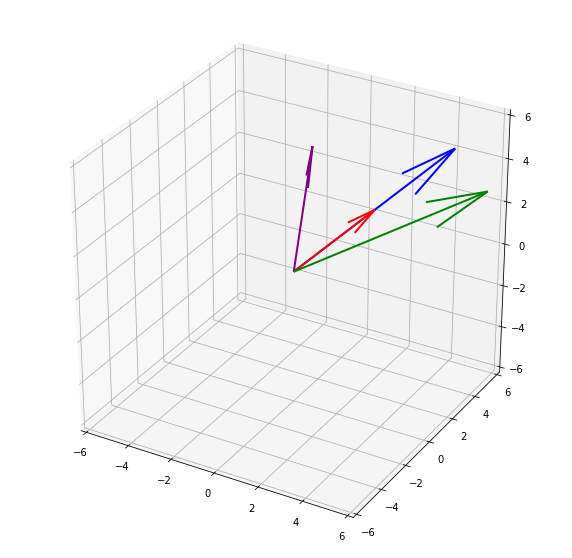

In [33]:
d_a = np.array([2, 3, 2])
d_b = 2 * d_a

i_a = np.array([6, 5, 3])
i_b = np.array([-2, 5, 3])

plot3D([d_b, d_a, i_a, i_b])

print(f' Red {d_a} and Blue {d_b} are dependent (colinear).\n', 
      f'Green {i_a} and Purple {i_b} are independent.')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$\vec{g}$ and $\vec{h}$ are colinear and dependent linearly. $\vec{h}=4\vec{g}$. So they together have a span of 1: they can only span $ℝ$. Any linear combination with them will only reach points in that space.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [34]:
# quick check for independence (by cross product)
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

print(np.cross(l, m), np.cross(l, n), np.cross(m, n))

[ 14 -10   2] [-20  10   0] [-56  30  -8]


They are lineraly independent, so have span of 3 (they span $ℝ^3$, meaning they can be used in any linear combination to reach any point in that space).

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



Any two vectors that are linear combinations of $c_1\hat{i}+c_2\hat{j}$, and are linearly independent, will span $ℝ^2$

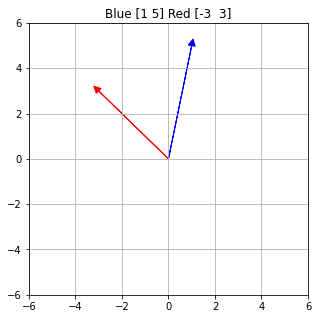

In [35]:
x = np.array([1, 5])
y = np.array([-3, 3])
plotVectors(x, y)

## 6.2 What does it mean to form a basis?

Any set of vectors that members of the valid linear combinations in any given space $ℝ^n$, and are linearly independent (not redundant), can form the basis for that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [36]:
p = np.array([[1, 2, 3],
             [-1, 0, 7],
             [4, 8, 2]])

np.linalg.matrix_rank(p)

3

The rank is 3 (all rows are linearly independent).

## 7.2 What does the rank of a matrix tell us?

It tells us if any of it's rows are independent. E.g.,

In [37]:
q = np.array([[1, 2, 3],
          [-2, 7, 5],
          [2, 4, 6]])

np.linalg.matrix_rank(q)

2

If the matrix has redundant (linearly dependent or colinear) rows. It also describes the dimensionality of the output a matrix used in a linear projection: if rank 2, a plane; if rank 3, a cube, and so forth. It also describes the span of the set of row vectors making up the matrix. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

$proj_{L}(w)$ Projects the vector $\vec{w}$ onto the line $L$, as if it were casting a shadow on that line. 

Red = [-1  2]
Projection (blue) = [0.5 1.5]


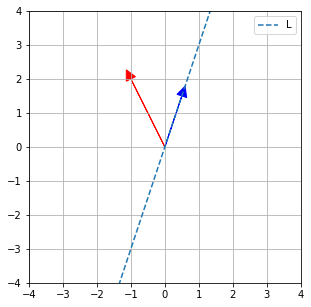

In [38]:
v = np.array([1, 3])
w = np.array([-1, 2])
print(f'Red = {w}')

# Calculate the projection
fraction = np.dot(w, v) / np.dot(v, v)
projection = np.multiply(fraction, v)
print(f'Projection (blue) = {projection}')

# Set axes for the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid()
ax.set_aspect('equal')

# Set limits for the plot
plt.xlim(-4,4)          
plt.ylim(-4,4)
axes = plt.gca()
axes.set_aspect('equal')

# Calculate the line L (slope is 3, as in v = [1 3])
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.plot(x_vals, y_vals, '--', label="L")
plt.arrow(0, 0, w[0], w[1], head_width=.3, head_length=.3, color='red')
plt.arrow(0, 0, projection[0], projection[1], head_width=.3, head_length=.3, 
          color='blue')

plt.legend();

You can see this in the visualization. $\vec{w}$ is the red vector; the blue vector is it's projection or 'shadow' on to the line $L$. Two dimensions projected on to one dimensional space. (Pretty cool!)


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

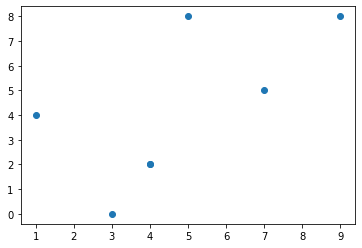

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()